<a href="https://colab.research.google.com/github/prachigupta2006/feature-engineering/blob/main/missing_values_handling_mean_median_and_arbitary_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
from google.colab import files
uploaded = files.upload()

Saving titanic_toy.csv to titanic_toy.csv


In [4]:
df= pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


# **X-TRAIN TEST SPLIT**

In [6]:
x=df.drop(columns=['Survived'])
y= df['Survived']

In [7]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [8]:
X_train.shape ,X_test.shape

((712, 3), (179, 3))

In [9]:
X_train.isnull().mean()

,0
Age,0.207865
Fare,0.050562
Family,0.000000


In [40]:
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()


here we imputed the men of the column into a variable named mean_age/mean_fare

In [64]:
X_train['age_median']=X_train['Age'].fillna(median_age)
X_train['age_mean']=X_train['Age'].fillna(mean_age)

X_train['fare_median']=X_train['Fare'].fillna(median_fare)
X_train['fare_mean']=X_train['Fare'].fillna(mean_fare)


and now we will make a column named age_median or more in the X_train and input the variable that had mean of the column in it in the observations where there was no/missing values

In [42]:
X_train.sample(10)

,Age,Fare,Family,age_99,age_minus,fare_999,fare_minus,age_minus1,fare_minus1,age_median,Age_mean,fare_median,fare_mean,age_mean
369,24.00,69.3000,0,24.00,24.00,69.3000,69.3000,24.00,69.3000,24.00,24.000000,69.3000,69.3000,24.000000
136,19.00,26.2833,2,19.00,19.00,26.2833,26.2833,19.00,26.2833,19.00,19.000000,26.2833,26.2833,19.000000
531,NaN,7.2292,0,99.00,-1.00,7.2292,7.2292,-1.00,7.2292,28.75,29.785904,7.2292,7.2292,29.785904
446,13.00,19.5000,1,13.00,13.00,19.5000,19.5000,13.00,19.5000,13.00,13.000000,19.5000,19.5000,13.000000
78,0.83,29.0000,2,0.83,0.83,29.0000,29.0000,0.83,29.0000,0.83,0.830000,29.0000,29.0000,0.830000
710,24.00,49.5042,0,24.00,24.00,49.5042,49.5042,24.00,49.5042,24.00,24.000000,49.5042,49.5042,24.000000
199,24.00,13.0000,0,24.00,24.00,13.0000,13.0000,24.00,13.0000,24.00,24.000000,13.0000,13.0000,24.000000
191,19.00,13.0000,0,19.00,19.00,13.0000,13.0000,19.00,13.0000,19.00,19.000000,13.0000,13.0000,19.000000
55,NaN,35.5000,0,99.00,-1.00,35.5000,35.5000,-1.00,35.5000,28.75,29.785904,35.5000,35.5000,29.785904
367,NaN,7.2292,0,99.00,-1.00,7.2292,7.2292,-1.00,7.2292,28.75,29.785904,7.2292,7.2292,29.785904


In [66]:
print("original Age variable variance:",X_train['Age'].var())
print("Age variance after median imputation:",X_train['age_median'].var())
print("Age variance after mean imputation:",X_train['age_mean'].var())


print("original fare variable variance:",X_train['Fare'].var())
print("Age variance after median imputation:",X_train['fare_median'].var())
print("Age variance after mean imputation:",X_train['fare_mean'].var())


original Age variable variance: 204.34951339046142
Age variance after median imputation: 161.98956633460548
Age variance after mean imputation: 161.81262452718676
original fare variable variance: 2448.1979137063163
Age variance after median imputation: 2340.09102197536
Age variance after mean imputation: 2324.2385256705534


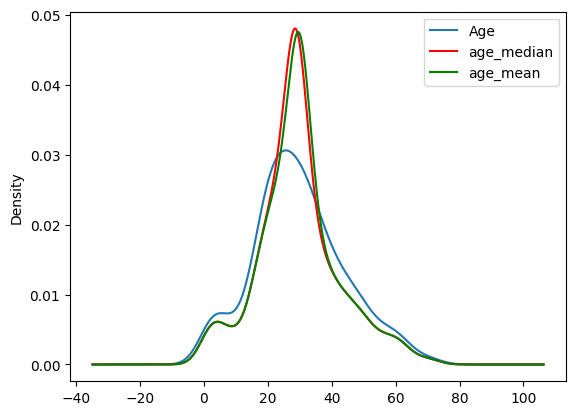

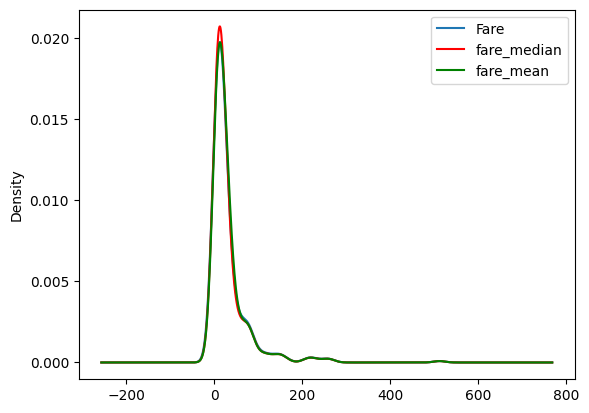

In [67]:
fig = plt.figure(5)
ax= fig.add_subplot(111)

#original variable distribution
X_train['Age'].plot(kind='kde',ax=ax)

#variable imputed with median
(X_train['age_median'].plot(kind='kde',ax=ax,color='red'))

#variable imputed with mean
(X_train['age_mean'].plot(kind='kde',ax=ax,color='green'))

#add legend
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

fig = plt.figure()
ax= fig.add_subplot(111)

#original variable distribution
X_train['Fare'].plot(kind='kde',ax=ax)

#variable imputed with median
(X_train['fare_median'].plot(kind='kde',ax=ax,color='red'))

#variable imputed with mean
(X_train['fare_mean'].plot(kind='kde',ax=ax,color='green'))

#add legend
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


plt.show()

In [45]:
X_train.cov()

,Age,Fare,Family,age_99,age_minus,fare_999,fare_minus,age_minus1,fare_minus1,age_median,Age_mean,fare_median,fare_mean,age_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188,204.349513,63.321188,204.349513,204.349513,64.858859,66.665205,204.349513
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914,125.558364,2448.197914,57.957599,55.603719,2448.197914,2448.197914,55.603719
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989,-4.149246,16.553989,-5.112563,-5.146106,16.476305,16.385048,-5.146106
age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400,-189.535540,-94.317400,149.990232,161.812625,-95.331684,-96.523193,161.812625
age_minus,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141,318.089620,114.394141,167.071135,161.812625,116.604457,119.200978,161.812625
fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982,257.379887,762.474982,133.229700,128.906752,1480.617015,2324.238526,128.906752
fare_minus,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678,114.394141,2378.567678,52.302458,50.140406,2353.585633,2324.238526,50.140406
age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141,318.089620,114.394141,167.071135,161.812625,116.604457,119.200978,161.812625
fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678,114.394141,2378.567678,52.302458,50.140406,2353.585633,2324.238526,50.140406
age_median,204.349513,57.957599,-5.112563,149.990232,167.071135,133.229700,52.302458,167.071135,52.302458,161.989566,161.812625,53.553455,55.023037,161.812625


In [46]:
X_train.corr()

,Age,Fare,Family,age_99,age_minus,fare_999,fare_minus,age_minus1,fare_minus1,age_median,Age_mean,fare_median,fare_mean,age_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585,1.000000,0.084585,1.000000,1.000000,0.087356,0.090156,1.000000
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000,0.142022,1.000000,0.091757,0.088069,1.000000,1.000000,0.088069
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233,-0.140668,0.205233,-0.242883,-0.244610,0.205942,0.205499,-0.244610
age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687,-0.344476,-0.062687,0.382000,0.412335,-0.063880,-0.064899,0.412335
age_minus,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514,1.000000,0.131514,0.736009,0.713233,0.135152,0.138632,0.713233
fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946,0.066411,0.071946,0.048172,0.046635,0.140853,0.221861,0.046635
fare_minus,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000,0.131514,1.000000,0.084260,0.080821,0.997599,0.988513,0.080821
age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514,1.000000,0.131514,0.736009,0.713233,0.135152,0.138632,0.713233
fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000,0.131514,1.000000,0.084260,0.080821,0.997599,0.988513,0.080821
age_median,1.000000,0.091757,-0.242883,0.382000,0.736009,0.048172,0.084260,0.736009,0.084260,1.000000,0.999454,0.086982,0.089673,0.999454


<Axes: >

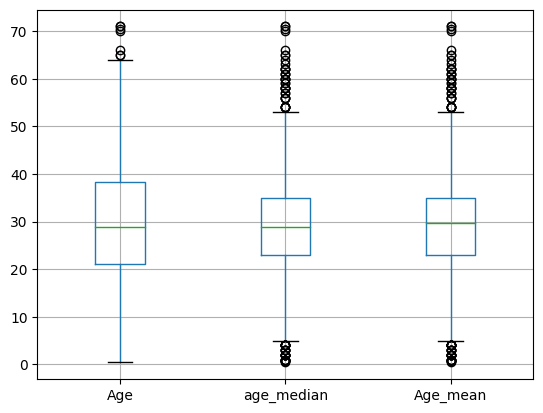

In [47]:
X_train[['Age','age_median','Age_mean']].boxplot()

<Axes: >

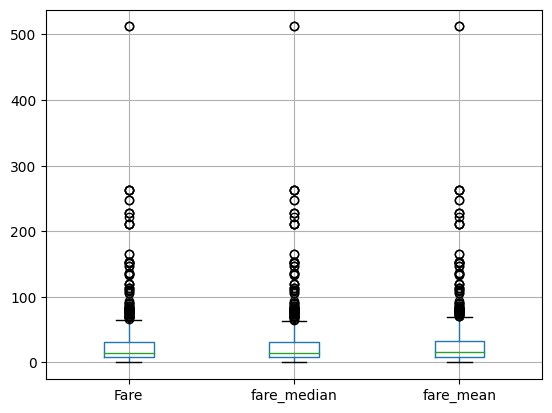

In [48]:
X_train[['Fare','fare_median','fare_mean']].boxplot()

# **USING SKLEARN**

TRAIN TEST SPLIT

In [49]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2,random_state=2)

PUTTING SIMPLEIMPUTER CLASS IN VARIABLES

In [50]:
from sklearn.impute import SimpleImputer
imputer1= SimpleImputer(strategy='median')
imputer2= SimpleImputer(strategy='mean')

TRANSFORM THE COLUMNS WITH COLUMN TRANSFORMER

In [51]:
trf= ColumnTransformer([
    ('imputer',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

FITTING THE TRANFORMATION ON X-TRAIN

In [52]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

CHECKING THE STEPS AND INFORMATION

In [53]:
trf.named_transformers_

{'imputer': SimpleImputer(strategy='median'),
 'imputer2': SimpleImputer(),
 'remainder': 'passthrough'}

In [54]:
trf.named_transformers_['imputer']

SimpleImputer(strategy='median')

In [55]:
trf.named_transformers_['imputer2']

SimpleImputer()

In [56]:
trf.named_transformers_['imputer'].statistics_

array([28.75])

# **ARBITARY VALUE IMPUTATION**

In [68]:
X_train['age_99'] = X_train['Age'].fillna(99)
X_train['age_minus1']=X_train['Age'].fillna(-1)

X_train['fare_999'] = X_train['Fare'].fillna(999)
X_train['fare_minus1']=X_train['Fare'].fillna(-1)

PRINTING THE VARIANCE OF EACH COLUMN

In [69]:
print("original Age variable variance:",X_train['Age'].var())
print("Age variance after median imputation:",X_train['age_99'].var())
print("Age variance after mean imputation:",X_train['age_minus1'].var())


print("original fare variable variance:",X_train['Fare'].var())
print("Age variance after median imputation:",X_train['fare_999'].var())
print("Age variance after mean imputation:",X_train['fare_minus1'].var())


original Age variable variance: 204.34951339046142
Age variance after median imputation: 951.7275570187188
Age variance after mean imputation: 318.0896202624488
original fare variable variance: 2448.1979137063163
Age variance after median imputation: 47219.202652176304
Age variance after mean imputation: 2378.5676784883494


# PLOTTING THE MEAN AND MEDIAN IMPUTED COLUMN ALONG WITH ORGINAL

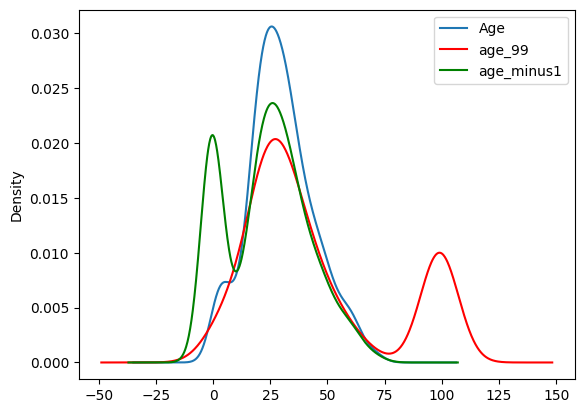

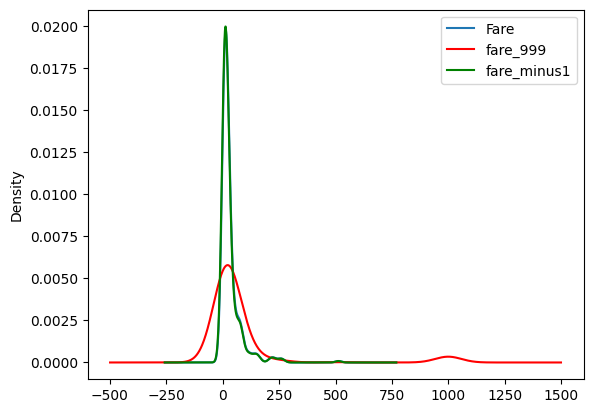

In [70]:
fig = plt.figure(5)
ax= fig.add_subplot(111)

#original variable distribution
X_train['Age'].plot(kind='kde',ax=ax)

#variable imputed with median
(X_train['age_99'].plot(kind='kde',ax=ax,color='red'))

#variable imputed with mean
(X_train['age_minus1'].plot(kind='kde',ax=ax,color='green'))

#add legend
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

fig = plt.figure()
ax= fig.add_subplot(111)

#original variable distribution
X_train['Fare'].plot(kind='kde',ax=ax)

#variable imputed with median
(X_train['fare_999'].plot(kind='kde',ax=ax,color='red'))

#variable imputed with mean
(X_train['fare_minus1'].plot(kind='kde',ax=ax,color='green'))

#add legend
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


plt.show()

# **USING SKLEARN:**

# TRAIN TEST SPLIT

In [71]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2,random_state=2)

# PUTTING "SIMPLEIMPUTATION" CLASS

In [72]:
ninenine= SimpleImputer(strategy='constant',fill_value=99)
minusone= SimpleImputer(strategy='constant',fill_value=-1)

# TRANSFORMATION

In [75]:
trf= ColumnTransformer([
    ('ninenine',ninenine,['Age']),
    ('minusone',minusone,['Fare'])
],remainder='passthrough')

# FITTING

In [76]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ninenine',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('minusone',
                                 SimpleImputer(fill_value=-1,
                                               strategy='constant'),
                                 ['Fare'])])

# CHECKING STEPS AND INFORMATION

In [78]:
trf.named_transformers_

{'ninenine': SimpleImputer(fill_value=99, strategy='constant'),
 'minusone': SimpleImputer(fill_value=-1, strategy='constant'),
 'remainder': 'passthrough'}

In [79]:
trf.named_transformers_['ninenine']

SimpleImputer(fill_value=99, strategy='constant')

In [80]:
trf.named_transformers_['minusone']

SimpleImputer(fill_value=-1, strategy='constant')

In [77]:
trf.named_transformers_['ninenine'].statistics_

array([99.])

In [81]:
trf.named_transformers_['minusone'].statistics_

array([-1.])